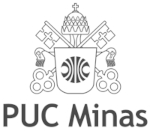

## Programa de Pós Graduação em Informática

### Disciplina: Natural Language Processing (NLP)

### Aluno: Felipe A. L. Reis

In [1]:
import datetime
import os, shutil
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def load_data(filename):
    data = pd.read_csv(filename, delimiter=',')
    
    return data
    
def seaborn_plot(g, title=None, title_pos=1.03):
    sns.set_theme(style="whitegrid")
    g.despine(left=True)
    
    if(g.legend != None):
        g.legend.set_title("")
        
    if(g.fig != None):
        g.fig.suptitle(title, y=title_pos, fontsize = 16)

---
# Análise Inicial dos Dados de Treino

#### Carregamento Inicial da Base de Dados de Treino

In [3]:
data = load_data('dataset/train.csv')
data

id        anchor                  target context  score
0      37d61fd2272659b1     abatement  abatement of pollution     A47   0.50
1      7b9652b17b68b7a4     abatement          act of abating     A47   0.75
2      36d72442aefd8232     abatement         active catalyst     A47   0.25
3      5296b0c19e1ce60e     abatement     eliminating process     A47   0.50
4      54c1e3b9184cb5b6     abatement           forest region     A47   0.00
...                 ...           ...                     ...     ...    ...
36468  8e1386cbefd7f245  wood article          wooden article     B44   1.00
36469  42d9e032d1cd3242  wood article              wooden box     B44   0.50
36470  208654ccb9e14fa3  wood article           wooden handle     B44   0.50
36471  756ec035e694722b  wood article         wooden material     B44   0.75
36472  8d135da0b55b8c88  wood article        wooden substrate     B44   0.50

[36473 rows x 5 columns]

#### Verificação da Lista de Contextos 

A verificação da lista de contextos tem como objetivo entender melhor as classes.

A partir desse entendimento, podem ser gerados métodos diferentes para solução de cada um dos problemas. 

Além disso, pode-se estudar o uso de Thesaurus ou qualquer outro dicionário de sinônimos que ajude na identificação das classes.

In [4]:
pd.unique(data.context)

array(['A47', 'A61', 'A62', 'C01', 'F16', 'F24', 'F28', 'H01', 'H04',
       'B23', 'B41', 'D03', 'E03', 'C08', 'D01', 'D21', 'C07', 'A45',
       'B01', 'B08', 'G04', 'G06', 'B65', 'G16', 'G01', 'A41', 'C23',
       'F23', 'B25', 'A63', 'B28', 'B63', 'F04', 'B60', 'B32', 'C09',
       'C02', 'G03', 'C10', 'B61', 'C21', 'F42', 'A23', 'C11', 'B29',
       'F02', 'B62', 'B64', 'E21', 'B24', 'B22', 'H05', 'B27', 'E04',
       'B21', 'D06', 'C04', 'B05', 'G02', 'H03', 'C06', 'G11', 'C12',
       'E02', 'F15', 'A46', 'B66', 'G07', 'G08', 'C22', 'B44', 'A01',
       'F03', 'C25', 'F22', 'G05', 'G21', 'B07', 'F41', 'E01', 'H02',
       'C13', 'F01', 'F27', 'C14', 'A44', 'B67', 'A24', 'B02', 'E05',
       'D05', 'F25', 'A43', 'A22', 'A21', 'E06', 'F21', 'G10', 'C03',
       'B81', 'F17', 'B03', 'G09', 'D04', 'F26', 'B31'], dtype=object)

#### Verificação da Quantidade de Itens por Classe

Análise das classes, para verificar se os contextos são uniformente distribuídos.

In [5]:
data.value_counts(subset=['context'])

context
H01        2186
H04        2177
G01        1812
A61        1477
F16        1091
           ... 
B03          47
F17          33
B31          24
A62          23
F26          18
Length: 106, dtype: int64

#### Verificação de Itens de Classes

Verificação de itens de algumas classes, para melhor entendimento do problema.

In [6]:
dt = data[data.context.isin(['H01','H04','G01'])]
dt

id                  anchor  \
47     09db0a872aa1d88c               abatement   
48     6bdd1d05ffa3401e               abatement   
245    a937ae580ea4bd97  achieve authentication   
246    ea154b802bebc48a  achieve authentication   
247    24eda11bf0665917  achieve authentication   
...                 ...                     ...   
36367  61350d231d52c186  wire grid polarization   
36368  59c0d33ccfb4f873  wire grid polarization   
36369  46017862b2545572  wire grid polarization   
36370  b4b17a1795a5ecc6  wire grid polarization   
36371  f1e1395c3c62f2ab  wire grid polarization   

                                target context  score  
47                     noise abatement     H01   0.50  
48                  emission abatement     H04   0.50  
245                     achieve access     H04   0.75  
246    achieve authentication accuracy     H04   0.50  
247              achieve authorization     H04   0.75  
...                                ...     ...    ...  
36367                     polarization     H04   0.50  
36368                       polarizing     H04   0.50  
36369                        wire grid     H04   0.25  
36370             wire grid polarizers     H04   1.00  
36371             wire grid polarizing     H04   1.00  

[6175 rows x 5 columns]

In [7]:
dt = data[data.context == 'F26']
dt

id          anchor                target context  score
22232  c8cc22d9f29c0a25  opposing walls            inner axis     F26   0.25
22233  9f722314be051ca3  opposing walls          inner length     F26   0.25
22234  dc202e2f124dd41f  opposing walls            inner wall     F26   0.50
22235  6370b64cc3077f6c  opposing walls           inner walls     F26   0.50
22236  26b60b1021b6061c  opposing walls         interior wall     F26   0.50
22237  52f027f8f0bbf90c  opposing walls        interior walls     F26   0.50
22238  2d880b708ac4091e  opposing walls                length     F26   0.25
22239  c6a0bc8ef2f4128c  opposing walls               lengths     F26   0.25
22240  a9203cc9c3c970db  opposing walls     longitudinal axis     F26   0.25
22241  14b2c0f102d28a9e  opposing walls   longitudinal length     F26   0.25
22242  6fd2fbc09bba9cd6  opposing walls   opposite inner wall     F26   0.50
22243  bcde39881cdea931  opposing walls  opposite inner walls     F26   0.50
22244  9e9fd37c14af9ddb  opposing walls       opposite length     F26   0.25
22245  1c242ad34ec75d91  opposing walls        opposite sides     F26   0.25
22246  e44e2dcbc9f97273  opposing walls        opposite walls     F26   1.00
22247  d23713223cc6ec3e  opposing walls                 sides     F26   0.25
22248  3574ac0f83df6a13  opposing walls             sidewalls     F26   0.50
22249  76a0173e81e12b69  opposing walls                 walls     F26   0.50

#### Análise de Scores

Análise amostral de correlação, com filtragem manual, para entedimento dos dados.

Análise estatística (apenas usando gráficos), para visualização da distribuição de scores.

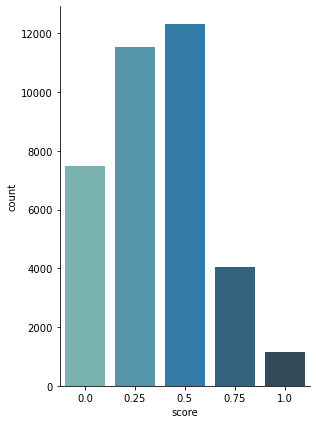

In [8]:
g = sns.catplot(x="score", palette="YlGnBu_d", height=6, aspect=.75, kind="count", data=data)

In [9]:
dt = data[(data.score == 1.) & (data.context == 'A47')]
dt

id                 anchor             target context  \
665    7920ba9fb0bf4578      adhesive mounting     adhesive mount     A47   
18887  979ebda2c79b19cc  magnetically actuated  magnetic actuated     A47   
19487  ba2571b86a600a1e          material item     material items     A47   
19489  4d909963dcc11fe7          material item     materials item     A47   
22174  cb55ecf65c3f70b8         opposing walls      opposed walls     A47   
22496  b6eae452a13ae0a4              outer bar        outside bar     A47   
30420  3b78263294867fd7             shift link        shift links     A47   
30422  f9296379f209d24e             shift link      shifting link     A47   
30783  0c378bb24e9d5814           sleeve upper       upper sleeve     A47   

       score  
665      1.0  
18887    1.0  
19487    1.0  
19489    1.0  
22174    1.0  
22496    1.0  
30420    1.0  
30422    1.0  
30783    1.0

In [10]:
dt = data[(data.score == 0.75) & (data.context == 'A47')]
dt

id                  anchor                      target  \
1      7b9652b17b68b7a4               abatement              act of abating   
659    4603e13580940257       adhesive mounting              adhering mount   
684    56f6684aa5e40205       adhesive mounting              mounting glues   
687    342b322ca958f5e4       adhesive mounting    mounting using adhesives   
693    48c19242424289f2       adhesive mounting              sticking mount   
2328   6b24e13abc1cabb8        automatic coffee      automatic coffee maker   
2335   f046b8d259101f07        automatic coffee                coffee maker   
2336   aad36521a66fe812        automatic coffee       coffee making machine   
5030   9e4fc60eee185e05        cervical support     cervical support collar   
5053   5a1172d3ab0e4686        cervical support  support the cervical spine   
9519   ed77d2afad1bfb90  displacement mechanism        displacement process   
12520  d0ab4b743cf6f04f         faucet assembly                      faucet   
13058  b454e8a55349481a           flexible belt                elastic belt   
15151  30149fe4d20947fe            hanging ring              exercise rings   
18889  87464999a69b97c3   magnetically actuated      magnetically activated   
22882  c54b88b2e3ea883d         overflow device          overflow apparatus   
30411  30008770c1106ed7              shift link      link used for shifting   
30732  bc7046c766fd56b5       similar absorbent  similar absorbent material   
30775  e4db039390cea3ff            sleeve upper                  top sleeve   
30785  e017559a330fd43d            sleeve upper               upper sleeves   
35607  8b67f43ebcbca14b            water intake                 water inlet   

      context  score  
1         A47   0.75  
659       A47   0.75  
684       A47   0.75  
687       A47   0.75  
693       A47   0.75  
2328      A47   0.75  
2335      A47   0.75  
2336      A47   0.75  
5030      A47   0.75  
5053      A47   0.75  
9519      A47   0.75  
12520     A47   0.75  
13058     A47   0.75  
15151     A47   0.75  
18889     A47   0.75  
22882     A47   0.75  
30411     A47   0.75  
30732     A47   0.75  
30775     A47   0.75  
30785     A47   0.75  
35607     A47   0.75

In [11]:
dt = data[(data.score == 0.) & (data.context == 'A47')]
dt

id        anchor                 target context  score
4      54c1e3b9184cb5b6     abatement          forest region     A47    0.0
14     9001756895ec8ca1     abatement  pollution certificate     A47    0.0
15     cc96541d4987b399     abatement         rent abatement     A47    0.0
18     1222e36d9a94c2a4     abatement        stone abutments     A47    0.0
19     a8c9e9f37d4d836a     abatement          tax abatement     A47    0.0
...                 ...           ...                    ...     ...    ...
30778  17d7f33426113e4f  sleeve upper             upper base     A47    0.0
30780  aece8877fd5dfb63  sleeve upper             upper case     A47    0.0
30781  bca4fb5baef8af2b  sleeve upper             upper hill     A47    0.0
30782  70259e69cdfb8d76  sleeve upper             upper room     A47    0.0
30786  005a55452e175cff  sleeve upper           upper thorax     A47    0.0

[91 rows x 5 columns]

#### Exibe registros existentes na coluna Anchor

Itens limitados aos 20 primeiros registros de Anchor únicos, para visualização das palavras que estão sendo utilizadas na base de dados.

In [12]:
pd.unique(data.anchor)[0:20]

array(['abatement', 'abnormal position', 'absorbent properties', 'acan',
       'accept information', 'achieve authentication', 'acid absorption',
       'ack', 'acoustooptic modulator', 'acrylate groups',
       'activating position', 'acylate with acids', 'adapt for learning',
       'adaptive linear', 'adhesive mounting', 'adjacent laterally',
       'adjust gas flow', 'adjustable multiple', 'aesthetic effects',
       'agitate means'], dtype=object)

In [13]:
data.value_counts(subset=['anchor'])

anchor                               
component composite coating              152
sheet supply roller                      150
source voltage                           140
perfluoroalkyl group                     136
el display                               135
                                        ... 
plug nozzle                                2
shannon                                    2
dry coating composition1                   2
peripheral nervous system stimulation      1
conduct conducting material                1
Length: 733, dtype: int64

#### Contagem de registros únicos por coluna

Conta a quantidade de registros únicos por coluna. 

Observa-se que a quantidade de Anchors (733) é consideravelmente superior à quantidade de Targets (29340).

In [14]:
data.nunique()

id         36473
anchor       733
target     29340
context      106
score          5
dtype: int64

#### Verificação de semelhança nos targets

Observa-se que alguns registros possuem palavras semelhantes, podendo passar pelas etapas de Lemmatization e Stemming.

In [15]:
pd.unique(data.target)[0:100]

array(['abatement of pollution', 'act of abating', 'active catalyst',
       'eliminating process', 'forest region', 'greenhouse gases',
       'increased rate', 'measurement level', 'minimising sounds',
       'mixing core materials', 'multi pollution abatement device',
       'noise reduction', 'pollution abatement',
       'pollution abatement incinerator', 'pollution certificate',
       'rent abatement', 'sorbent material',
       'source items pollution abatement technology', 'stone abutments',
       'tax abatement', 'water bodies', 'emission abatement',
       'prevention', 'prophylaxis', 'abatement apparatus', 'treatment',
       'abating', 'central hub', 'control panel', 'deficiency',
       'diminished chord', 'diminished image', 'diminishing',
       'eliminating', 'eliminating emissions', 'eliminating pollutants',
       'increasing', 'increasing order', 'mitigation',
       'pollution control', 'processing unit', 'removing air pollutants',
       'subsiding', 'treating em

---
# Análise Inicial Tabela de Códigos

In [16]:
codes = load_data('dicionario_dados/titles.csv')
codes

code                                              title  \
0                  A                                  HUMAN NECESSITIES   
1                A01  AGRICULTURE; FORESTRY; ANIMAL HUSBANDRY; HUNTI...   
2               A01B  SOIL WORKING IN AGRICULTURE OR FORESTRY; PARTS...   
3           A01B1/00  Hand tools (edge trimmers for lawns A01G3/06  ...   
4           A01B1/02  Spades; Shovels {(hand-operated dredgers E02F3...   
...              ...                                                ...   
260471  Y10T483/1864                      including tool pot or adapter   
260472  Y10T483/1873                                    Indexing matrix   
260473  Y10T483/1882                                        Rotary disc   
260474  Y10T483/1891                                      Chain or belt   
260475    Y10T483/19                                      Miscellaneous   

       section  class subclass  group  main_group  
0            A    NaN      NaN    NaN         NaN  
1            A    1.0      NaN    NaN         NaN  
2            A    1.0        B    NaN         NaN  
3            A    1.0        B    1.0         0.0  
4            A    1.0        B    1.0         2.0  
...        ...    ...      ...    ...         ...  
260471       Y   10.0        T  483.0      1864.0  
260472       Y   10.0        T  483.0      1873.0  
260473       Y   10.0        T  483.0      1882.0  
260474       Y   10.0        T  483.0      1891.0  
260475       Y   10.0        T  483.0        19.0  

[260476 rows x 7 columns]

#### União de Dados e Contexto (Classes)

In [17]:
data_codes = data.merge(codes, left_on='context', right_on='code')
data_codes['title'] = data_codes['title'].transform(lambda x: x.lower()).astype('string')
data_codes

id        anchor                  target context  score  \
0      37d61fd2272659b1     abatement  abatement of pollution     A47   0.50   
1      7b9652b17b68b7a4     abatement          act of abating     A47   0.75   
2      36d72442aefd8232     abatement         active catalyst     A47   0.25   
3      5296b0c19e1ce60e     abatement     eliminating process     A47   0.50   
4      54c1e3b9184cb5b6     abatement           forest region     A47   0.00   
...                 ...           ...                     ...     ...    ...   
36468  718f1c6953e3942f    undulation     undulatory swimmers     B31   0.00   
36469  4dc407e6d0aa7844    undulation       voltage fluctuate     B31   0.00   
36470  de69548ad79caccc  web transfer       transfer from web     B31   0.75   
36471  6620317413e6e03f  web transfer         transfer to web     B31   0.25   
36472  96946de83b530746  web transfer            transfer web     B31   0.75   

      code                                              title section  class  \
0      A47  furniture; domestic articles or appliances; co...       A   47.0   
1      A47  furniture; domestic articles or appliances; co...       A   47.0   
2      A47  furniture; domestic articles or appliances; co...       A   47.0   
3      A47  furniture; domestic articles or appliances; co...       A   47.0   
4      A47  furniture; domestic articles or appliances; co...       A   47.0   
...    ...                                                ...     ...    ...   
36468  B31  making articles of paper, cardboard or materia...       B   31.0   
36469  B31  making articles of paper, cardboard or materia...       B   31.0   
36470  B31  making articles of paper, cardboard or materia...       B   31.0   
36471  B31  making articles of paper, cardboard or materia...       B   31.0   
36472  B31  making articles of paper, cardboard or materia...       B   31.0   

      subclass  group  main_group  
0          NaN    NaN         NaN  
1          NaN    NaN         NaN  
2          NaN    NaN         NaN  
3          NaN    NaN         NaN  
4          NaN    NaN         NaN  
...        ...    ...         ...  
36468      NaN    NaN         NaN  
36469      NaN    NaN         NaN  
36470      NaN    NaN         NaN  
36471      NaN    NaN         NaN  
36472      NaN    NaN         NaN  

[36473 rows x 12 columns]

---
# Análise Inicial dos Dados de Teste

In [18]:
test_data = load_data('dataset/test.csv')
test_data

id                       anchor  \
0   4112d61851461f60                     opc drum   
1   09e418c93a776564              adjust gas flow   
2   36baf228038e314b               lower trunnion   
3   1f37ead645e7f0c8                cap component   
4   71a5b6ad068d531f           neural stimulation   
5   474c874d0c07bd21                     dry corn   
6   442c114ed5c4e3c9          tunneling capacitor   
7   b8ae62ea5e1d8bdb      angular contact bearing   
8   faaddaf8fcba8a3f  produce liquid hydrocarbons   
9   ae0262c02566d2ce             diesel fuel tank   
10  a8808e31641e856d            chemical activity   
11  16ae4b99d3601e60         transmit to platform   
12  25c555ca3d5a2092                  oil tankers   
13  5203a36c501f1b7c            generate in layer   
14  b9fdc772bb8fd61c                 slip segment   
15  7aa5908a77a7ec24                   el display   
16  d19ef3979396d47e              overflow device   
17  fd83613b7843f5e1     beam traveling direction   
18  2a619016908bfa45                   el display   
19  733979d75f59770d               equipment unit   
20  6546846df17f9800                   halocarbyl   
21  3ff0e7a35015be69         perfluoroalkyl group   
22  12ca31f018a2e2b9          speed control means   
23  03ba802ed4029e4d                   arm design   
24  c404f8b378cbb008               hybrid bearing   
25  78243984c02a72e4                     end pins   
26  de51114bc0faec3e             organic starting   
27  7e3aff857f056bf9                make of slabs   
28  26c3c6dc6174b589                   seal teeth   
29  b892011ab2e2cabc            carry by platform   
30  8247ff562ca185cc                        polls   
31  c057aecbba832387              upper clamp arm   
32  9f2279ce667b21dc              clocked storage   
33  b9ea2b06a878df6f              coupling factor   
34  79795133c30ef097       different conductivity   
35  25522ee5411e63e9               hybrid bearing   

                           target context  
0   inorganic photoconductor drum     G02  
1               altering gas flow     F23  
2                  lower locating     B60  
3                   upper portion     D06  
4       artificial neural network     H04  
5                 dry corn starch     C12  
6               capacitor housing     G11  
7       contact therapy radiation     B23  
8        produce a treated stream     C10  
9               diesel fuel tanks     F02  
10     dielectric characteristics     B01  
11               direct receiving     H04  
12                   oil carriers     B63  
13              generate by layer     G02  
14                   slip portion     B22  
15                   illumination     G02  
16                     oil filler     E04  
17                  concrete beam     H05  
18             electroluminescent     C23  
19                power detection     H02  
20      halogen addition reaction     C07  
21                        hydroxy     A63  
22                   control loop     G05  
23                    steel plate     F16  
24                 bearing system     F04  
25                       end days     A44  
26                organic farming     B61  
27                    making cake     E04  
28                teeth whitening     F01  
29              carry on platform     B60  
30                 pooling device     B21  
31                     end visual     A61  
32         clocked storage device     G01  
33                turns impedance     G01  
34               carrier polarity     H03  
35            corrosion resistant     F16

#### União dos Dados de Teste com os Códigos

In [19]:
test_codes = test_data.merge(codes, left_on='context', right_on='code')
test_codes['title'] = test_codes['title'].transform(lambda x: x.lower()).astype('string')
test_codes

id                       anchor  \
0   4112d61851461f60                     opc drum   
1   5203a36c501f1b7c            generate in layer   
2   7aa5908a77a7ec24                   el display   
3   09e418c93a776564              adjust gas flow   
4   36baf228038e314b               lower trunnion   
5   b892011ab2e2cabc            carry by platform   
6   1f37ead645e7f0c8                cap component   
7   71a5b6ad068d531f           neural stimulation   
8   16ae4b99d3601e60         transmit to platform   
9   474c874d0c07bd21                     dry corn   
10  442c114ed5c4e3c9          tunneling capacitor   
11  b8ae62ea5e1d8bdb      angular contact bearing   
12  faaddaf8fcba8a3f  produce liquid hydrocarbons   
13  ae0262c02566d2ce             diesel fuel tank   
14  a8808e31641e856d            chemical activity   
15  25c555ca3d5a2092                  oil tankers   
16  b9fdc772bb8fd61c                 slip segment   
17  d19ef3979396d47e              overflow device   
18  7e3aff857f056bf9                make of slabs   
19  fd83613b7843f5e1     beam traveling direction   
20  2a619016908bfa45                   el display   
21  733979d75f59770d               equipment unit   
22  6546846df17f9800                   halocarbyl   
23  3ff0e7a35015be69         perfluoroalkyl group   
24  12ca31f018a2e2b9          speed control means   
25  03ba802ed4029e4d                   arm design   
26  25522ee5411e63e9               hybrid bearing   
27  c404f8b378cbb008               hybrid bearing   
28  78243984c02a72e4                     end pins   
29  de51114bc0faec3e             organic starting   
30  26c3c6dc6174b589                   seal teeth   
31  8247ff562ca185cc                        polls   
32  c057aecbba832387              upper clamp arm   
33  9f2279ce667b21dc              clocked storage   
34  b9ea2b06a878df6f              coupling factor   
35  79795133c30ef097       different conductivity   

                           target context code  \
0   inorganic photoconductor drum     G02  G02   
1               generate by layer     G02  G02   
2                    illumination     G02  G02   
3               altering gas flow     F23  F23   
4                  lower locating     B60  B60   
5               carry on platform     B60  B60   
6                   upper portion     D06  D06   
7       artificial neural network     H04  H04   
8                direct receiving     H04  H04   
9                 dry corn starch     C12  C12   
10              capacitor housing     G11  G11   
11      contact therapy radiation     B23  B23   
12       produce a treated stream     C10  C10   
13              diesel fuel tanks     F02  F02   
14     dielectric characteristics     B01  B01   
15                   oil carriers     B63  B63   
16                   slip portion     B22  B22   
17                     oil filler     E04  E04   
18                    making cake     E04  E04   
19                  concrete beam     H05  H05   
20             electroluminescent     C23  C23   
21                power detection     H02  H02   
22      halogen addition reaction     C07  C07   
23                        hydroxy     A63  A63   
24                   control loop     G05  G05   
25                    steel plate     F16  F16   
26            corrosion resistant     F16  F16   
27                 bearing system     F04  F04   
28                       end days     A44  A44   
29                organic farming     B61  B61   
30                teeth whitening     F01  F01   
31                 pooling device     B21  B21   
32                     end visual     A61  A61   
33         clocked storage device     G01  G01   
34                turns impedance     G01  G01   
35               carrier polarity     H03  H03   

                                                title section  class subclass  \
0                                              optics       G    2.0      NaN   
1                                          

---
# Análise Inicial das Informações para Submissão

In [20]:
sample_submission = load_data('dataset/sample_submission.csv')
sample_submission

id  score
0   4112d61851461f60      0
1   09e418c93a776564      0
2   36baf228038e314b      0
3   1f37ead645e7f0c8      0
4   71a5b6ad068d531f      0
5   474c874d0c07bd21      0
6   442c114ed5c4e3c9      0
7   b8ae62ea5e1d8bdb      0
8   faaddaf8fcba8a3f      0
9   ae0262c02566d2ce      0
10  a8808e31641e856d      0
11  16ae4b99d3601e60      0
12  25c555ca3d5a2092      0
13  5203a36c501f1b7c      0
14  b9fdc772bb8fd61c      0
15  7aa5908a77a7ec24      0
16  d19ef3979396d47e      0
17  fd83613b7843f5e1      0
18  2a619016908bfa45      0
19  733979d75f59770d      0
20  6546846df17f9800      0
21  3ff0e7a35015be69      0
22  12ca31f018a2e2b9      0
23  03ba802ed4029e4d      0
24  c404f8b378cbb008      0
25  78243984c02a72e4      0
26  de51114bc0faec3e      0
27  7e3aff857f056bf9      0
28  26c3c6dc6174b589      0
29  b892011ab2e2cabc      0
30  8247ff562ca185cc      0
31  c057aecbba832387      0
32  9f2279ce667b21dc      0
33  b9ea2b06a878df6f      0
34  79795133c30ef097      0
35  25522ee5411e63e9      0

---
# Correlação entre Dados de Treinamento e Testes

Entendimento de como as palavras do conjunto de treinamento estão relacionadas às palavras do conjunto de testes.

Análise para verificação da existência das expressões tanto no conjunto de treinamento quanto no conjunto de testes.

Alguns exemplos foram retirados aleatoriamento do conjunto de testes para verificação.

In [21]:
data[(data.anchor == 'polls') & (data.target == 'pooling device')]

id anchor          target context  score
24655  8247ff562ca185cc  polls  pooling device     B21    0.0

In [22]:
test_data[(test_data.anchor == 'polls') & (test_data.target == 'pooling device')]

id anchor          target context
30  8247ff562ca185cc  polls  pooling device     B21

In [23]:
data[(data.anchor == 'dry corn') & (data.target == 'dry corn starch')]

id    anchor           target context  score
10274  474c874d0c07bd21  dry corn  dry corn starch     C12    0.5

In [24]:
data[(data.anchor == 'dry corn')]

id    anchor           target context  score
10263  002fe75f36b27660  dry corn         car dent     C12   0.00
10264  2305958492f405da  dry corn           cereal     C12   0.25
10265  f1dcbf40a2010da2  dry corn          cereals     C12   0.25
10266  b5e14b28192554a7  dry corn             corn     C12   0.25
10267  60f16c9d3747aaa3  dry corn           corner     C12   0.00
10268  bdd3774dd515cf87  dry corn        dent corn     C12   0.50
10269  bab20e5f8616ca53  dry corn       dried corn     C12   1.00
10270  9b7c7ec3508ed418  dry corn    dried kernels     C12   0.75
10271  3db1d5401628d7e0  dry corn      dried maize     C12   0.75
10272  c65c27259e2995d9  dry corn              dry     C12   0.25
10273  e9e4ae5ffada78f3  dry corn   dry corn flour     C12   0.50
10274  474c874d0c07bd21  dry corn  dry corn starch     C12   0.50
10275  2be145ee62944ed9  dry corn          dry ice     C12   0.00
10276  1582a287e5e70ddf  dry corn        dry maize     C12   0.75
10277  646517a4e0696079  dry corn        dry wheat     C12   0.25
10278  0efddbd69f2a05bd  dry corn     dry zea mays     C12   0.75
10279  6cf9bab125f324c7  dry corn            grain     C12   0.25
10280  72566f5506a6bc7c  dry corn           grains     C12   0.25
10281  b99911aa94232e68  dry corn         pop corn     C12   0.50
10282  83c417b514597861  dry corn       pop singer     C12   0.00
10283  dc8943aa9d40aaf4  dry corn         pop star     C12   0.00
10284  f1db3bc888f45df3  dry corn           solids     C12   0.00
10285  1147c182e13d5414  dry corn     starchy seed     C12   0.25
10286  86009272589e4b52  dry corn           vacuum     C12   0.00
10287  f837a8b741fceb98  dry corn           weight     C12   0.25
10288  ade4f00e120d6fe7  dry corn         zea mays     C12   0.25